In [16]:
# Project Step II Notebook
# Author: Buğra Aydın 30618 
# Date Created: 05/05/2024

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt


In [18]:
# Loading data
data = pd.read_csv('C:\\Users\\LENOVO\\Desktop\\CS 210\\project\\COMBINED\\COMBINEDfin.csv')


# Calculating the mean of specified airline stock prices and create a new column
data['AVG*'] = data[['DAL', 'AAL', 'LUV', 'UAL']].mean(axis=1)

# Dropping not numeric columns (for this data, only date column is dropped.)
numeric_data = data.select_dtypes(include=[np.number])

In [19]:
# Displaying the data types and prove there is no missing values

# Missing values are handled manually on excel before loading.

print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1259 non-null   object 
 1   DAL     1259 non-null   float64
 2   AAL     1259 non-null   float64
 3   LUV     1259 non-null   float64
 4   UAL     1259 non-null   float64
 5   OIL     1259 non-null   float64
 6   AVG*    1259 non-null   float64
dtypes: float64(6), object(1)
memory usage: 69.0+ KB
None


In [20]:
#Describing info of data.

print(data.describe())

               DAL          AAL          LUV          UAL          OIL  \
count  1259.000000  1259.000000  1259.000000  1259.000000  1259.000000   
mean     41.245838    18.934210    42.985782    52.531771    67.617744   
std       9.780179     6.767953    10.192512    18.996675    20.519474   
min      19.190001     9.040000    22.230000    19.920000   -37.630000   
25%      33.879999    13.755000    34.160000    39.810000    55.075000   
50%      39.919998    16.639999    43.180000    45.950001    69.250000   
75%      47.640000    22.280000    51.830000    56.090000    80.490000   
max      63.160000    36.930000    64.099998    95.279999   123.700000   

              AVG*  
count  1259.000000  
mean     38.924400  
std      10.729685  
min      18.005001  
25%      30.626250  
50%      36.147499  
75%      45.992500  
max      61.895000  


In [21]:
# Calculate mean, variance, standard deviation and median of Average Prices.
average_price_mean = data['AVG*'].mean()
average_price_variance = data['AVG*'].var()
average_price_median = data['AVG*'].median()
print(f"Mean of Average Prices of Airlines: {round(average_price_mean,2)}")
print(f"Variance of Average Prices of Airlines: {round(average_price_variance,2)}")
print(f"Standard deviation of Average Prices of Airlines: {round(sqrt(average_price_median),2)}")
print(f"Median of Average Prices of Airlines: {round(average_price_median,2)}")



Mean of Average Prices of Airlines: 38.92
Variance of Average Prices of Airlines: 115.13
Standard deviation of Average Prices of Airlines: 6.01
Median of Average Prices of Airlines: 36.15


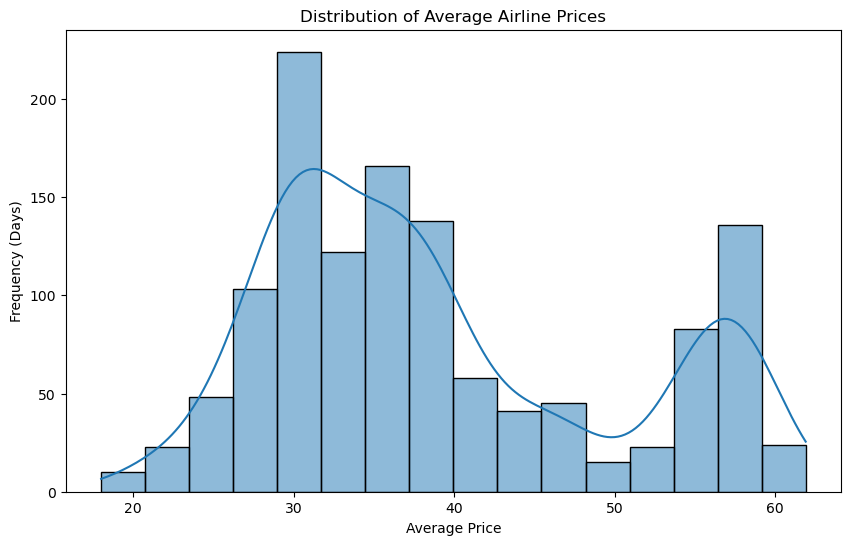

In [22]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['AVG*'], kde=True)
plt.title('Distribution of Average Airline Prices')
plt.xlabel('Average Price')
plt.ylabel('Frequency (Days)')
plt.show()  



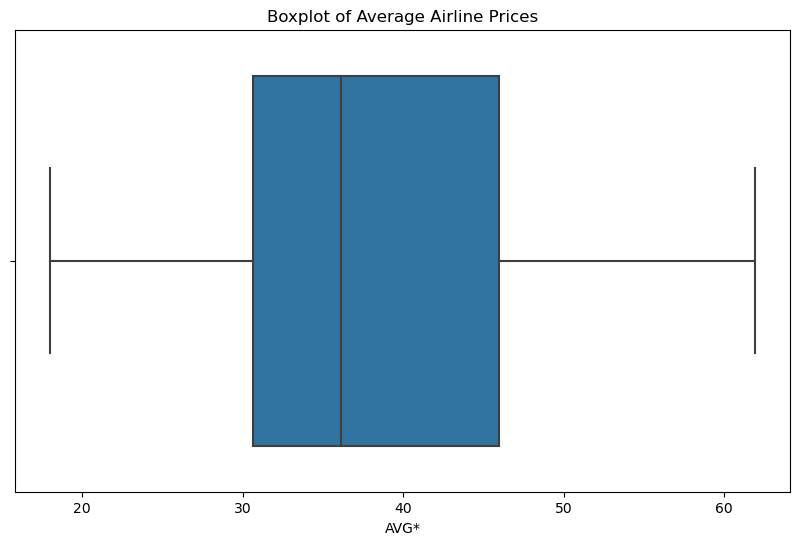

In [23]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['AVG*'])
plt.title('Boxplot of Average Airline Prices')
plt.show()



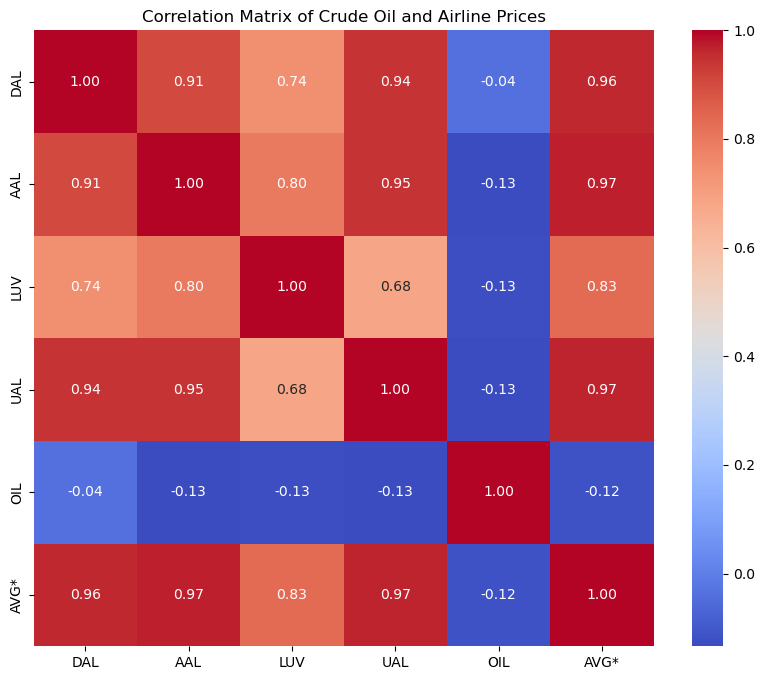

In [24]:
# Calculating the correlation matrix.
correlation_matrix = numeric_data.corr(method='pearson') # Pearson as correlation type


# Plotting the correlation matrix
plt.figure(figsize =(10, 8))
sns.heatmap(correlation_matrix, annot = True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Crude Oil and Airline Prices')
plt.show()


In [25]:
# Pearson correlation test for each airline.
from scipy.stats import pearsonr

airlines = ['DAL', 'AAL', 'LUV', 'UAL','AVG*']
results = {}

for airline in airlines:
    corr, p_value = pearsonr(data['OIL'], data[airline]) # every correlation between oil and airlines.
    results[airline] = {'Correlation': corr, 'P-value': p_value}

for airline, result in results.items():
    print(airline,"vs Oil: Correlation =", result['Correlation']," | ", "P-value =", result['P-value']) # to output.


DAL vs Oil: Correlation = -0.03808896519904212  |  P-value = 0.17681232466803606
AAL vs Oil: Correlation = -0.1336358214046357  |  P-value = 1.951665217011399e-06
LUV vs Oil: Correlation = -0.12887473428341012  |  P-value = 4.488359629261182e-06
UAL vs Oil: Correlation = -0.13393606740341885  |  P-value = 1.850012420282173e-06
AVG* vs Oil: Correlation = -0.1196413301559843  |  P-value = 2.0789382423732357e-05


In [26]:
from sklearn.model_selection import train_test_split

X = data[['OIL']]  # Independent variable
y = data['AVG*']  # Dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)
# For test size o.2 chosen, and 2024 for seed.

In [27]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

# Model called and values are fitted on

LinearRegression()

In [28]:
from sklearn.metrics import mean_squared_error, r2_score

# Prediction on the test set
y_pred = model.predict(X_test)

# Calculating R^2 and RMSE
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("R^2:", r2)
print("RMSE:", rmse)



R^2: -0.05212400332172673
RMSE: 10.568127718912939


In [29]:
print("Coefficient (slope):", model.coef_)
print("Intercept:", model.intercept_)

# Showing slope and the intercept of the lineer line.

Coefficient (slope): [-0.07936535]
Intercept: 44.644660961382044


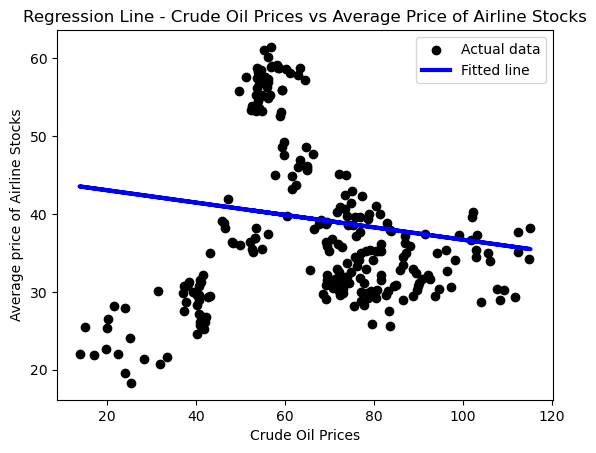

In [30]:
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color='black', label='Actual data')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Fitted line')
plt.xlabel('Crude Oil Prices')
plt.ylabel('Average price of Airline Stocks')
plt.title('Regression Line - Crude Oil Prices vs Average Price of Airline Stocks')
plt.legend()
plt.show()

# Showing linear regression model.

In [31]:
#Buğra Aydın 30618